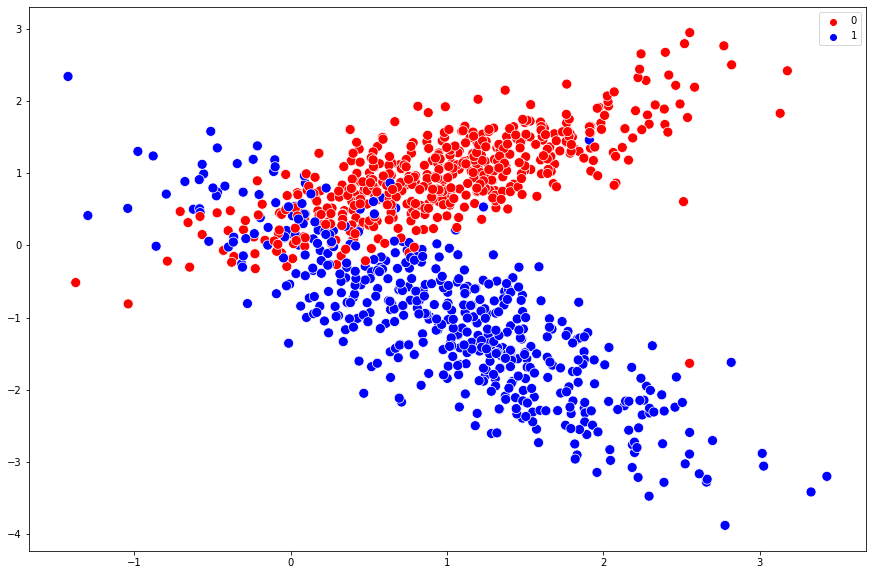

In [173]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

plt.figure(figsize=(15, 10))


sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette=["red", "blue"], s=100)

In [166]:
import numpy as np
import json



# CLASS TO SERIALIZE NUMPY ARRAYS TO SAVE MODEL TO JSON
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
    
    
def save_keras(nn_model):
    k = {}
    for i in range(len(nn_model.layers)):
        a = nn_model.layers[i].get_weights()
        s = list(a)

        k[str(i+1)] = {}
        k[str(i+1)]["weights"] = s[0]
        k[str(i+1)]["bias"] =s[1]
        k[str(i+1)]["activation"] = str(nn_model.layers[i].activation).split()[1]

    with open("model.json", "w", encoding="utf-8") as json_f:
        json.dump(k, json_f, cls=NumpyEncoder, ensure_ascii=False, indent=4)
    
    
class Network(object):

    
    # initialize network
    def __init__(self):
        self.architecture = {}
        self.activation_funcs = {
            "relu" :    self.relu,
            "softmax" : self.softmax,
            "sigmoid" : self.sigmoid,
            "identity": self.identity        }

            
    # INITIALIZE, LOAD AND SAVE MODEL--------
            
    def initialize_parameters(self, sizes, activations):
        np.random.seed(99)
        if len(sizes) -1 != len(activations):
            print("number of activations must be equal to number of layers - 1")
        else:
            for i in range(len(sizes) -1):
                self.architecture[str(i+1)] = {
                    "weights" : np.random.rand(sizes[i], sizes[i+1])* 0.1,
                    "bias" : np.random.rand(sizes[i+1])* 0.1,
                    "activation" : activations[i]
                }
            
            
    def load_model(self):
        with open("model.json", "r") as dict_file:
            model = json.load(dict_file) 
        for layer in model:
            for key in model[layer]:
                if isinstance(model[layer][key], list):
                    model[layer][key] = np.array(model[layer][key])
        self.architecture = model.copy()
           
    
    def save_model(self):
        with open("model.json", "w", encoding="utf-8") as json_f:
            json.dump(self.architecture, json_f, cls=NumpyEncoder, ensure_ascii=False, indent=4)
        
     
    # ACTIVATION FUNCTIONS AND DERIVATIVES--
    
    def sigmoid(self, z, deriv = False):
        if deriv == True:
            return z * (1 - z)
        else:
            return 1.0/(1.0 + np.exp(-z))
    
        
    def relu(self, z, deriv = False):
        if deriv == True:
            z[z > 0] = 1
            z[z <= 0] = 0
            return z
        else:
            return np.maximum(0, z)

        
    def softmax(self, z, deriv = False):
        if deriv == True:
            return softmax(z)  * (1 - softmax(z))
        else:
            m = np.max(z, axis=1, keepdims=True)
            e = np.exp(z - m)
            return e / np.sum(e, axis=1, keepdims=True)
    

    def identity(self, x):
        return x
    
    # ERROR-----------------------------------
    
    def cost(self, y_hat, y):
        y_hat = y_hat.reshape(y.shape)
        cost = np.sum((y_hat - y)**2) / 2.0
        return cost

    def cost_prime(self, y_hat, y):
        y_hat = y_hat.reshape(y.shape)
        return y_hat - y

    
    # METHODS---------------------------------
    
    def predict(self, a):
        for i in range(len(self.architecture)):
            activation = self.activation_funcs[self.architecture[str(i+1)]["activation"]]
            a = activation(np.dot(a, self.architecture[str(i+1)]["weights"]) + self.architecture[str(i+1)]["bias"])
        return a
    
    def backprop(self, a):
        y_hat = predict(self, x)
        
        Eo = (y_hat.reshape(y.shape) - y) * relu_prime(Zo)
    

    

In [151]:
net = Network()

In [167]:
net.load_model()

In [162]:
mipreds = net.feedforward(X_test)
mipreds

array([[5.17481850e-01, 4.82518150e-01],
       [2.03627443e-02, 9.79637256e-01],
       [6.07766713e-01, 3.92233287e-01],
       [9.99272997e-01, 7.27003488e-04],
       [9.30450626e-01, 6.95493742e-02],
       [7.31139518e-01, 2.68860482e-01],
       [1.27965829e-02, 9.87203417e-01],
       [1.25753634e-02, 9.87424637e-01],
       [2.28457021e-02, 9.77154298e-01],
       [1.88174249e-02, 9.81182575e-01],
       [9.78957477e-01, 2.10425231e-02],
       [2.53421260e-02, 9.74657874e-01],
       [6.37354938e-01, 3.62645062e-01],
       [5.21757182e-01, 4.78242818e-01],
       [9.84500951e-02, 9.01549905e-01],
       [2.32466137e-01, 7.67533863e-01],
       [1.63505303e-02, 9.83649470e-01],
       [2.86820592e-03, 9.97131794e-01],
       [5.84599735e-03, 9.94154003e-01],
       [4.26243859e-02, 9.57375614e-01],
       [2.46083965e-01, 7.53916035e-01],
       [9.87715132e-01, 1.22848681e-02],
       [9.82761663e-01, 1.72383369e-02],
       [6.23130639e-01, 3.76869361e-01],
       [3.275300

In [22]:
mynn = []
for i in range(len(mipreds)):
    if mipreds[i][0] > mipreds[i][1]:        
        mynn.append(0)
    else:
        mynn.append(1)
mynn

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


In [104]:
mipreds[mipreds < 0.5] = 0
mipreds[mipreds>0.5] = 1

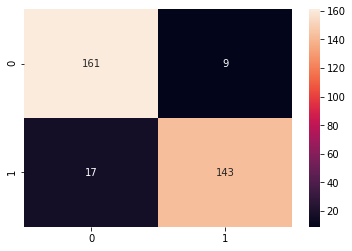

In [23]:
smatrix = confusion_matrix(y_test, mynn)
sns.heatmap(smatrix, annot=True, fmt="d")

In [155]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation


# define the model 
nn_model = Sequential([
    Dense(name = "hidden", activation='sigmoid', units = 100, input_dim = 2),
    Dense(name = "output", activation='softmax', units = 2),
])

# compile the model
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [157]:

y_nn_train = []
for i in y_train:
    if i == 0:
        y_nn_train.append([1, 0])
    else:
        y_nn_train.append([0, 1])
        
y_nn_train = np.array (y_nn_train)
y_nn_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [158]:
nn_model.fit(X_train, y_nn_train, epochs = 100)

Epoch 1/100
670/670 [==============================] - 0s 149us/step - loss: 0.7082
Epoch 2/100
670/670 [==============================] - 0s 37us/step - loss: 0.6350
Epoch 3/100
670/670 [==============================] - 0s 36us/step - loss: 0.5863
Epoch 4/100
670/670 [==============================] - 0s 37us/step - loss: 0.5396
Epoch 5/100
670/670 [==============================] - 0s 42us/step - loss: 0.5019
Epoch 6/100
670/670 [==============================] - 0s 33us/step - loss: 0.4698
Epoch 7/100
670/670 [==============================] - 0s 41us/step - loss: 0.4416
Epoch 8/100
670/670 [==============================] - 0s 43us/step - loss: 0.4143
Epoch 9/100
670/670 [==============================] - 0s 43us/step - loss: 0.3922
Epoch 10/100
670/670 [==============================] - 0s 37us/step - loss: 0.3734
Epoch 11/100
670/670 [==============================] - 0s 42us/step - loss: 0.3570
Epoch 12/100
670/670 [==============================] - 0s 40us/step - loss: 0.3435


670/670 [==============================] - 0s 42us/step - loss: 0.2756
Epoch 99/100
670/670 [==============================] - 0s 41us/step - loss: 0.2757
Epoch 100/100
670/670 [==============================] - 0s 43us/step - loss: 0.2757


In [159]:
y_nn_pred = nn_model.predict(X_test)
y_nn_pred

array([[5.17481804e-01, 4.82518196e-01],
       [2.03627590e-02, 9.79637206e-01],
       [6.07766628e-01, 3.92233372e-01],
       [9.99273002e-01, 7.27003149e-04],
       [9.30450618e-01, 6.95493817e-02],
       [7.31139481e-01, 2.68860519e-01],
       [1.27965901e-02, 9.87203419e-01],
       [1.25753665e-02, 9.87424672e-01],
       [2.28456967e-02, 9.77154315e-01],
       [1.88174304e-02, 9.81182635e-01],
       [9.78957415e-01, 2.10425332e-02],
       [2.53421385e-02, 9.74657834e-01],
       [6.37354910e-01, 3.62645030e-01],
       [5.21757185e-01, 4.78242815e-01],
       [9.84500498e-02, 9.01549876e-01],
       [2.32466146e-01, 7.67533898e-01],
       [1.63505245e-02, 9.83649492e-01],
       [2.86820577e-03, 9.97131824e-01],
       [5.84599655e-03, 9.94154036e-01],
       [4.26243693e-02, 9.57375646e-01],
       [2.46083990e-01, 7.53916025e-01],
       [9.87715065e-01, 1.22848703e-02],
       [9.82761681e-01, 1.72383431e-02],
       [6.23130679e-01, 3.76869351e-01],
       [3.275301

In [20]:
y_pred_nn = []
for i in range(len(y_nn_pred)):
    if y_nn_pred[i][0] > y_nn_pred[i][1]:        
        y_pred_nn.append(0)
    else:
        y_pred_nn.append(1)

In [69]:
y_pred_nn == mynn

True

In [98]:
pred[pred < 0.5] = 0
pred[pred>0.5] = 1

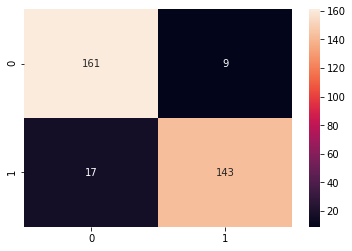

In [21]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cmatrix, annot=True, fmt="d")

In [65]:
print(nn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                30        
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
def save_keras(nn_model):
    k = {}
    for i in range(len(nn_model.layers)):
        a = nn_model.layers[i].get_weights()
        s = list(a)

        k[str(i+1)] = {}
        k[str(i+1)]["weights"] = s[0]
        k[str(i+1)]["bias"] =s[1]
        k[str(i+1)]["activation"] = str(nn_model.layers[i].activation).split()[1]

    with open("model.json", "w", encoding="utf-8") as json_f:
        json.dump(k, json_f, cls=NumpyEncoder, ensure_ascii=False, indent=4)
        
    
save_keras(nn_model)